### 1. Загрузка данных и отображение временного ряда:

Мы загрузили данные акций компании Apple и построили график цен. Это позволяет увидеть общее изменение стоимости акций за заданный временной интервал. На графике видно значительный рост стоимости акций с начала 2020 года, с кратковременными спадом в середине 2022 года и ростом к концу 2023 года.

Код для отображения временного ряда:

[*********************100%***********************]  1 of 1 completed
<ipython-input-8-a3d19bfce105>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Close': 'Price'}, inplace=True)


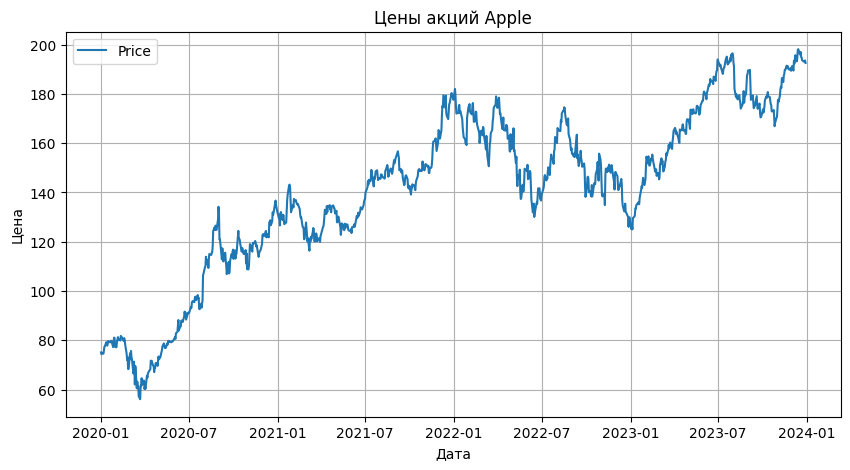

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных временного ряда цен акций, например, Apple
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Оставим только колонку с закрытыми ценами (Close)
data = data[['Close']]
data.rename(columns={'Close': 'Price'}, inplace=True)

# Построение графика временного ряда
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Price'], label='Price')
plt.title('Цены акций Apple')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

### 2. Оценка временного ряда:

График автокорреляции показал, что существует сильная автокорреляция на малых лагах, которая постепенно уменьшается до нуля. Это свидетельствует о том, что временной ряд не является случайным, а имеет определенные тренды. Начиная с лага около 200, корреляция становится незначительной.

Код для построения графика автокорреляции:

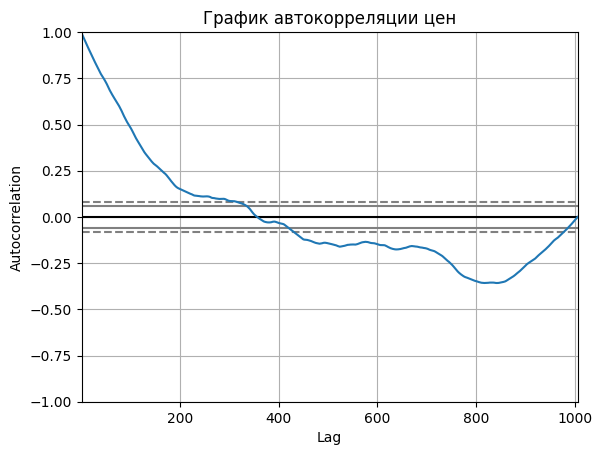

In [9]:
# График автокорреляции
pd.plotting.autocorrelation_plot(data['Price'])
plt.title('График автокорреляции цен')
plt.show()

### 3. Скользящие средние (SMA):

Были построены четыре простые скользящие средние (SMA) с окнами 5, 10, 30 и 50. График показывает, что более короткие окна лучше следуют за ценой акций, тогда как более длинные окна (SMA 50) сглаживают колебания и показывают общие тренды. Скользящие средние помогают устранить шум и выявить долгосрочные тренды.

Код для построения SMA:

<ipython-input-10-18640fc78124>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_5'] = data['Price'].rolling(window=5).mean()
<ipython-input-10-18640fc78124>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_10'] = data['Price'].rolling(window=10).mean()
<ipython-input-10-18640fc78124>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

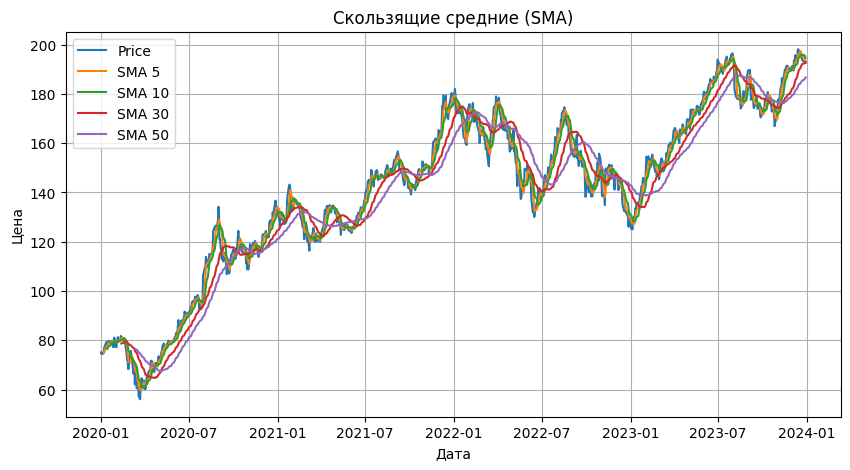

In [10]:
# Скользящие средние с окнами 5, 10, 30, 50
data['SMA_5'] = data['Price'].rolling(window=5).mean()
data['SMA_10'] = data['Price'].rolling(window=10).mean()
data['SMA_30'] = data['Price'].rolling(window=30).mean()
data['SMA_50'] = data['Price'].rolling(window=50).mean()

# График скользящих средних
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Price'], label='Price')
plt.plot(data.index, data['SMA_5'], label='SMA 5')
plt.plot(data.index, data['SMA_10'], label='SMA 10')
plt.plot(data.index, data['SMA_30'], label='SMA 30')
plt.plot(data.index, data['SMA_50'], label='SMA 50')
plt.title('Скользящие средние (SMA)')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

### 4. Экспоненциальные скользящие средние (EMA):

Экспоненциальные скользящие средние (EMA) также были построены с теми же окнами. EMA лучше отслеживают текущие изменения, так как они больше учитывают последние данные. Это видно на графике, где EMA более точно следуют за реальной ценой по сравнению с SMA.

Код для построения EMA:

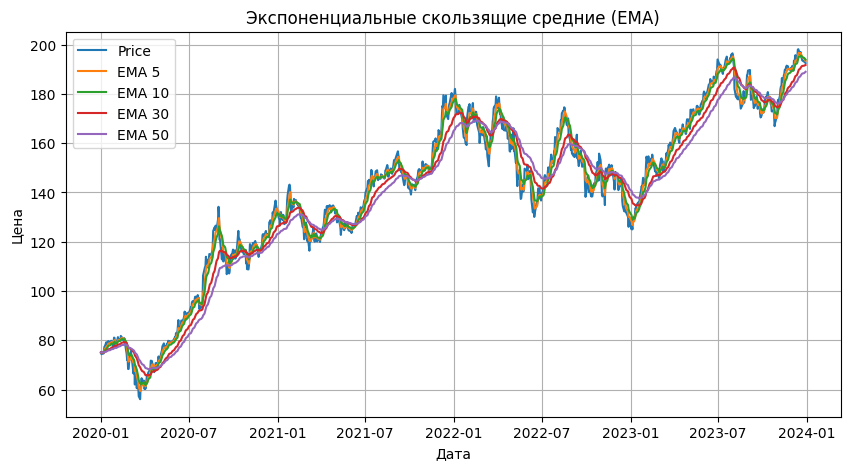

In [11]:
# Экспоненциальные скользящие средние с окнами 5, 10, 30, 50
data['EMA_5'] = data['Price'].ewm(span=5, adjust=False).mean()
data['EMA_10'] = data['Price'].ewm(span=10, adjust=False).mean()
data['EMA_30'] = data['Price'].ewm(span=30, adjust=False).mean()
data['EMA_50'] = data['Price'].ewm(span=50, adjust=False).mean()

# График экспоненциальных скользящих средних
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Price'], label='Price')
plt.plot(data.index, data['EMA_5'], label='EMA 5')
plt.plot(data.index, data['EMA_10'], label='EMA 10')
plt.plot(data.index, data['EMA_30'], label='EMA 30')
plt.plot(data.index, data['EMA_50'], label='EMA 50')
plt.title('Экспоненциальные скользящие средние (EMA)')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

### 5. Прогноз на основе EMA:

Для прогноза на 5 периодов вперед был использован EMA с окном 5. На графике видно, что прогноз следует за текущим трендом, однако точность прогноза может снижаться при увеличении прогнозируемого горизонта.

Код для прогноза:

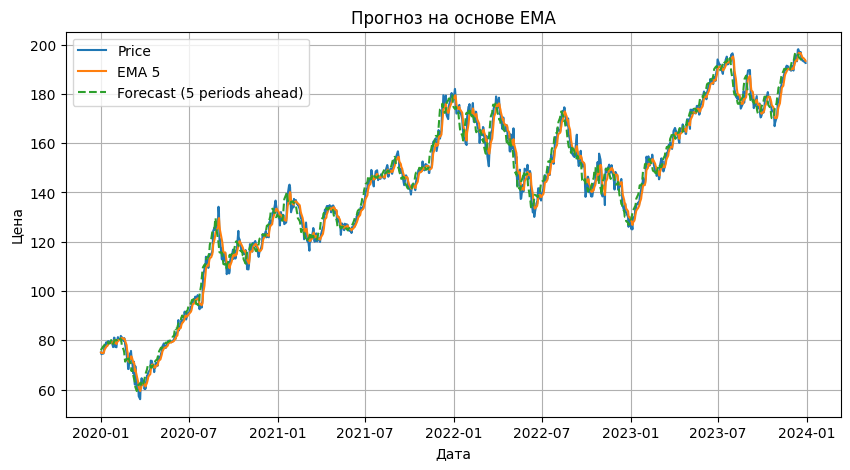

In [12]:
# Прогноз на 5 периодов вперед с использованием EMA_5
future_periods = 5
data['Forecast'] = data['EMA_5'].shift(-future_periods)

# Отображение прогноза на графике
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Price'], label='Price')
plt.plot(data.index, data['EMA_5'], label='EMA 5')
plt.plot(data.index, data['Forecast'], label='Forecast (5 periods ahead)', linestyle='--')
plt.title('Прогноз на основе EMA')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

### 6. Выводы:

- **Временной ряд** цен акций Apple показывает значительный рост за последние годы с периодическими коррекциями.
- **Автокорреляция** указывает на наличие сильных трендов в данных, что делает этот временной ряд подходящим для анализа и прогнозирования.
- **Простые скользящие средние (SMA)** сглаживают колебания цен, но с большими окнами они могут терять связь с текущими изменениями.
- **Экспоненциальные скользящие средние (EMA)**, в отличие от SMA, более чувствительны к последним изменениям, что делает их более точными для краткосрочного анализа.
- **Прогноз на основе EMA** может быть полезен для краткосрочного предсказания будущих цен, однако для более длительных прогнозов требуется учитывать дополнительные факторы.

Скользящие средние, особенно EMA, являются мощным инструментом для анализа и прогнозирования временных рядов в финансовых данных, но их следует использовать с осторожностью, особенно при попытке долгосрочного прогнозирования.